In [1]:
from pathlib import Path
import pickle
from textwrap import fill
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from results_processing import load_accuracies_from_results, format_results_as_str, generate_results_table, generate_table_from_df

In [4]:
pathlist = list(Path.cwd().glob('xgb_results*'))

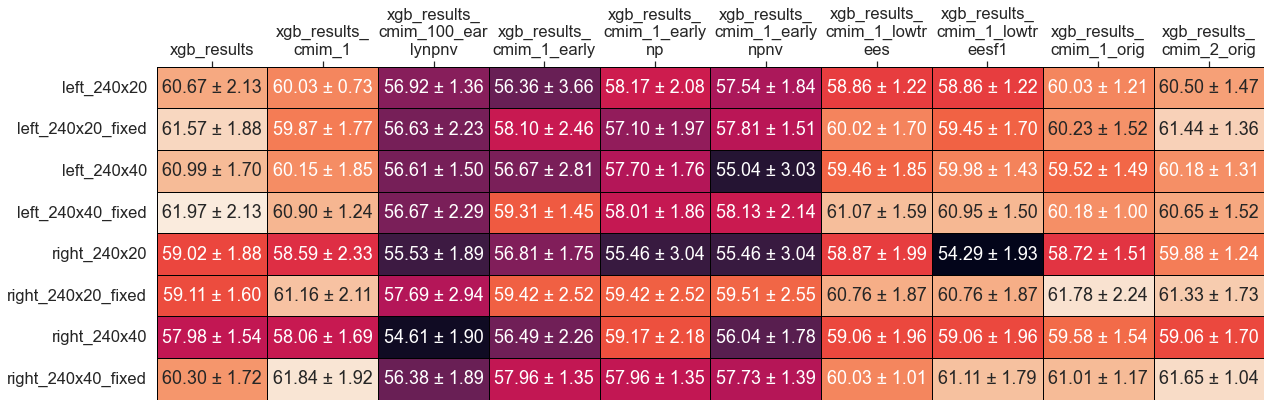

In [42]:
%matplotlib inline
df, results, results_str = generate_results_table(pathlist, [p.name for p in pathlist], None, None, (18, 6))

In [62]:
cancer_acc, train_cancer_acc = load_accuracies_from_results('_additional_xgb_tests/cancer_results/xgb_results', include_train_acc=True)
tests_acc = {  # Resultados obtenidos por mí en los datasets benchmark
    'breast_cancer (acc)': cancer_acc['left_240x20'][0]*100,
    'Higgs-1M (auc)': 0.8400475736800282
}
nucleo_acc = {  # Resultados obtenidos por mí en los datasets benchmark de nucleótidos
    'S51 (Acc)': 0.7264484805943084,
    'S51 (Sn)': 0.7673282442748092,
    'S51 (Sp)': 0.709413312300356,
    'S51 (MCC)': 0.4551998515114749,
    'H41 (Acc)': 0.9061946902654867,
    'H41 (Sn)': 0.8123893805309734,
    'H41 (Sp)': 1.0,
    'H41 (MCC)': 0.8278061558051331,
    'M41 (Acc)': 0.8875862068965518,
    'M41 (Sn)': 0.7752473363774733,
    'M41 (Sp)': 1.0,
    'M41 (MCC)': 0.796367024124542
}
benchmark_res = {  # Resultados originales de los benchmarks
    'breast_cancer (acc)': 95.80,  # https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
    'Higgs-1M (auc)': 0.8245  # Chen, T. and Guestrin, C., 2016, August. Xgboost: A scalable tree boosting system. In Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining (pp. 785-794).
}
benchmark_nucleo = {  # Resultados originales del paper de nucleótidos
    'S51 (Acc)': 0.7314,  #  Qiang, X., Chen, H., Ye, X., Su, R. and Wei, L., 2018. M6AMRFS: robust prediction of N6-methyladenosine sites with sequence-based features in multiple species. Frontiers in genetics, 9, p.495.
    'S51 (Sp)': 0.7284,
    'S51 (Sn)': 0.7345,
    'S51 (MCC)': 0.4629,
    'H41 (Acc)': 0.9089,
    'H41 (Sn)': 0.8195,
    'H41 (Sp)': 0.9982,
    'H41 (MCC)': 0.8311,
    'M41 (Acc)': 0.8890,
    'M41 (Sn)': 0.7779,
    'M41 (Sp)': 1.0,
    'M41 (MCC)': 0.7979
}

In [16]:
from results_processing import generate_table_from_df

In [41]:
res = {'Resultados Paper': benchmark_nucleo,
       'Resultados Míos': nucleo_acc}
res_txt = {'Resultados Paper': {i: f'{v:.4f}' for i, v in benchmark_nucleo.items()},
       'Resultados Míos': {i: f'{v:.4f}' for i, v in nucleo_acc.items()}}
df_res = pd.DataFrame(res).transpose()
df_txt = pd.DataFrame(res_txt).transpose()

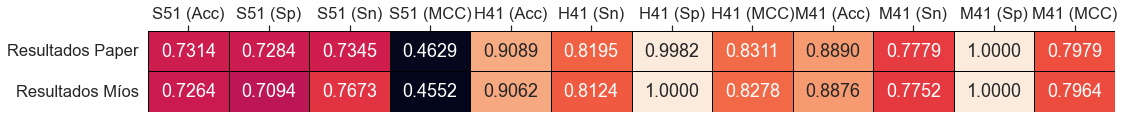

<Figure size 1152x144 with 0 Axes>

In [45]:
generate_table_from_df(df_res, df_txt, r'S:\iris_gender_python_final\_additional_xgb_tests\nucleotids',
                       'comparacion_s51.png', figsize=(16, 2), display=True)

In [71]:
nucleo_acc1 = {  # Resultados obtenidos por mí en los datasets benchmark de nucleótidos
    'S51 (Acc)': 0.7264484805943084,
    'S51 (Sn)': 0.7673282442748092,
    'S51 (Sp)': 0.709413312300356,
    'S51 (MCC)': 0.4551998515114749,
}
nucleo_acc2 = { 
    'H41 (Acc)': 0.9061946902654867,
    'H41 (Sn)': 0.8123893805309734,
    'H41 (Sp)': 1.0,
    'H41 (MCC)': 0.8278061558051331,
}
nucleo_acc3 = { 
    'M41 (Acc)': 0.8875862068965518,
    'M41 (Sn)': 0.7752473363774733,
    'M41 (Sp)': 1.0,
    'M41 (MCC)': 0.796367024124542
}
benchmark_nucleo1 = {  # Resultados originales del paper de nucleótidos
    'S51 (Acc)': 0.7314,  #  Qiang, X., Chen, H., Ye, X., Su, R. and Wei, L., 2018. M6AMRFS: robust prediction of N6-methyladenosine sites with sequence-based features in multiple species. Frontiers in genetics, 9, p.495.
    'S51 (Sp)': 0.7284,
    'S51 (Sn)': 0.7345,
    'S51 (MCC)': 0.4629,
}
benchmark_nucleo2 = {
    'H41 (Acc)': 0.9089,
    'H41 (Sn)': 0.8195,
    'H41 (Sp)': 0.9982,
    'H41 (MCC)': 0.8311,
}
benchmark_nucleo3 = {
    'M41 (Acc)': 0.8890,
    'M41 (Sn)': 0.7779,
    'M41 (Sp)': 1.0,
    'M41 (MCC)': 0.7979
}

In [72]:
res1 = {'Resultados Paper': benchmark_nucleo1,
       'Resultados Míos': nucleo_acc1}
res_txt1 = {'Resultados Paper': {i: f'{v:.4f}' for i, v in benchmark_nucleo1.items()},
       'Resultados Míos': {i: f'{v:.4f}' for i, v in nucleo_acc1.items()}}
res2 = {'Resultados Paper': benchmark_nucleo2,
       'Resultados Míos': nucleo_acc2}
res_txt2 = {'Resultados Paper': {i: f'{v:.4f}' for i, v in benchmark_nucleo2.items()},
       'Resultados Míos': {i: f'{v:.4f}' for i, v in nucleo_acc2.items()}}
res3 = {'Resultados Paper': benchmark_nucleo3,
       'Resultados Míos': nucleo_acc3}
res_txt3 = {'Resultados Paper': {i: f'{v:.4f}' for i, v in benchmark_nucleo3.items()},
       'Resultados Míos': {i: f'{v:.4f}' for i, v in nucleo_acc3.items()}}
df_res1 = pd.DataFrame(res1).transpose()
df_txt1 = pd.DataFrame(res_txt1).transpose()
df_res2 = pd.DataFrame(res2).transpose()
df_txt2 = pd.DataFrame(res_txt2).transpose()
df_res3 = pd.DataFrame(res3).transpose()
df_txt3 = pd.DataFrame(res_txt3).transpose()

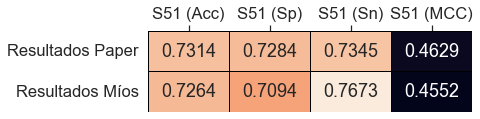

<Figure size 504x144 with 0 Axes>

In [74]:
generate_table_from_df(df_res1, df_txt1, r'S:\iris_gender_python_final\_additional_xgb_tests\nucleotids',
                       'comparacion_s51.png', figsize=(7, 2), display=True)

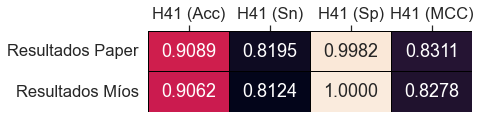

<Figure size 504x144 with 0 Axes>

In [75]:
generate_table_from_df(df_res2, df_txt2, r'S:\iris_gender_python_final\_additional_xgb_tests\nucleotids',
                       'comparacion_h41.png', figsize=(7, 2), display=True)

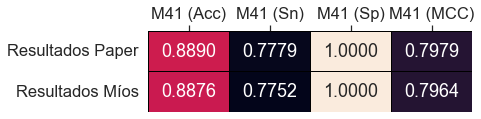

<Figure size 504x144 with 0 Axes>

In [76]:
generate_table_from_df(df_res3, df_txt3, r'S:\iris_gender_python_final\_additional_xgb_tests\nucleotids',
                       'comparacion_m41.png', figsize=(7, 2), display=True)

In [63]:
res5 = {'Resultados Originales': benchmark_res,
        'Resultados Míos': tests_acc}
res_txt5 = {'Resultados Originales': {i: f'{v:.4f}' for i, v in benchmark_res.items()},
            'Resultados Míos': {i: f'{v:.4f}' for i, v in tests_acc.items()}}

df_res5 = pd.DataFrame(res5).transpose()
df_txt5 = pd.DataFrame(res_txt5).transpose()

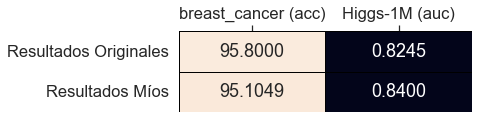

<Figure size 504x144 with 0 Axes>

In [68]:
generate_table_from_df(df_res5, df_txt5, r'S:\iris_gender_python_final\_additional_xgb_tests', 'bench.png', figsize=(7, 2), display=True)

## Process nucleotids results

In [46]:
with open(r'S:\iris_gender_python_final\_additional_xgb_tests\nucleotids_fs\s51\s51_model_results.pickle', 'rb') as f:
    results: dict = pickle.load(f)

accs = [r['accuracy'] for r in results.values()]
n_feats = range(1, len(accs) + 1)

Text(0, 0.5, 'Accuracy')

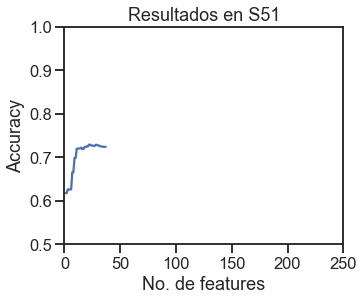

In [56]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('ticks')
sns.set_context('talk')
sns.lineplot(x=n_feats, y=accs)
plt.xlim([0, 250])  # len(accs) + 1
plt.ylim([0.5, 1.0])
plt.title('Resultados en S51')
plt.xlabel('No. de features')
plt.ylabel('Accuracy')

In [9]:
print(max(accs))

0.7291114620806645
